# In this notebook, we are going to analyze the veracity of the hypotheses put forward.

## With this objective, we are going to use different visualization techniques to shows the data.

## 1. Import libraries

In [1]:
import pandas as pd  #used
import numpy as np  #used
import json
import seaborn as sns  #used
import matplotlib as plt  #used
import matplotlib.pyplot as plt #used
from bokeh.plotting import figure  #used
from bokeh.io import output_notebook, show  #used
from bokeh.models import ColumnDataSource  #used
from bokeh.layouts import gridplot  #used
from bokeh.plotting import output_file  #used
import geopandas as gpd #used
import plotly.graph_objects as go
import shapely
shapely.speedups.enable()

## 2. Import cleaned databases

In [2]:
restaurants = pd.read_csv("../output/restaurants.csv", encoding = "ISO-8859-1")
province_data = pd.read_csv("../output/province_data.csv", encoding = "ISO-8859-1")
tourists2019 = pd.read_csv("../output/tourists2019.csv", encoding = "ISO-8859-1")

## 3. Hypotheses

---

### Hypothesis 1:
### "Awarded restaurants are equally distributed per Spanish regions."

#### Michelin Star restaurant per Spanish region:

In [3]:
restaurants["region"].value_counts()

Cataluna              54
C.Valenciana          23
Pais Vasco            22
C.Madrid              22
Andalucia             17
Galicia               14
Castilla y Leon       13
Islas Baleares        10
Asturias               8
Castilla la Mancha     7
Aragon                 7
Islas Canarias         5
La Rioja               5
Cantabria              5
Navarra                4
Murcia                 3
Extremadura            1
Name: region, dtype: int64

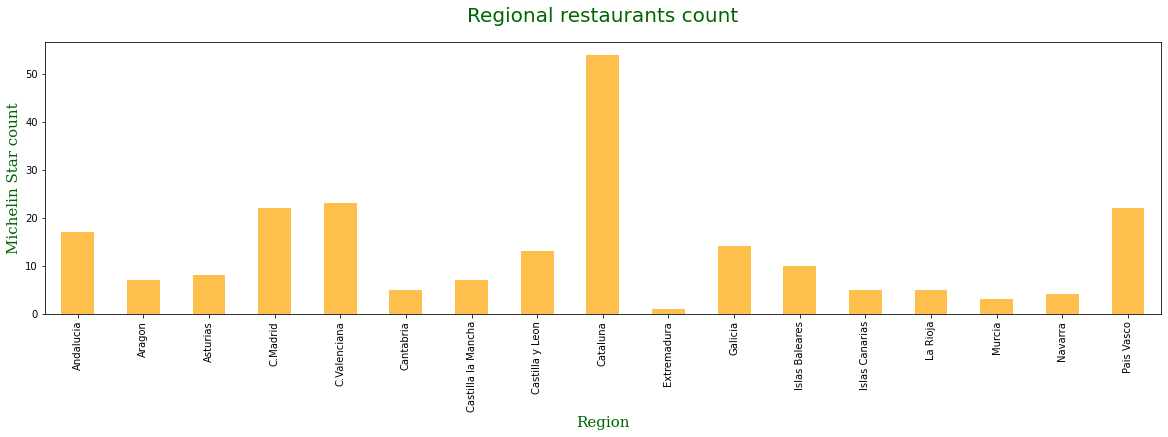

<Figure size 900x600 with 0 Axes>

In [4]:
fig, ax = plt.subplots(figsize = (20, 5))
font = {'family': 'serif',
        'color':  'darkgreen',
        'weight': 'normal',
        'size': 15,
        }
ax.set_title('Regional restaurants count', 
             pad = 20, 
             fontdict = {'fontsize':20, 'color': 'darkgreen'})
restaurants.groupby(['region']).count()['restaurant'].plot(kind='bar',color = 'orange',alpha = 0.7,)
plt.xlabel('Region', fontdict=font)
plt.ylabel('Michelin Star count', fontdict=font)
plt.figure(dpi=150)
plt.show()

---

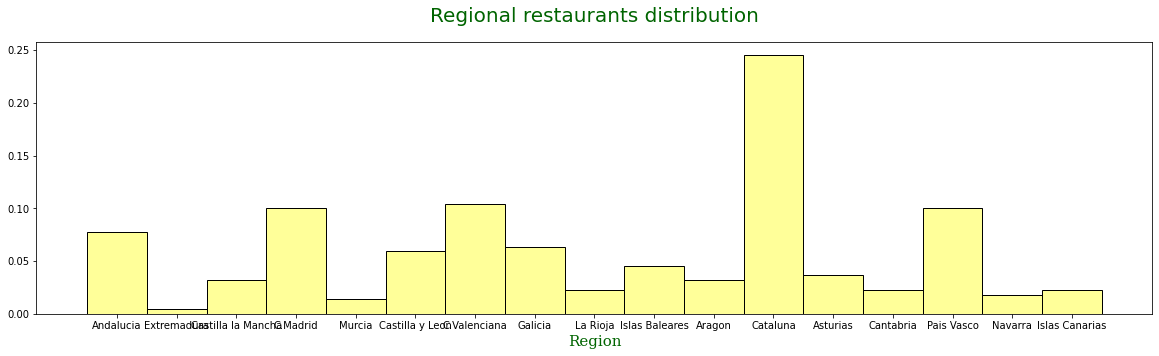

In [5]:
fig, ax = plt.subplots(figsize = (20, 5))
font = {'family': 'serif',
        'color':  'darkgreen',
        'weight': 'normal',
        'size': 15,
        }
ax.set_title('Regional restaurants distribution', 
             pad = 20, 
             fontdict = {'fontsize':20, 'color': 'darkgreen'})
sns.histplot(restaurants.region, stat = "probability", discrete = True, color = 'yellow',alpha = 0.4)
plt.xlabel('Region', fontdict=font)
plt.ylabel('', fontdict=font)
plt.show()
#plt.savefig("regional_distribution.png",dpi=300)

---
***Hypothesis number 1 is not true: the distribution of restaurants per region is not equal.***

The total amount of awarded resturants in Spain is of 220.

At the top end is ***Catalonia, with 54 (around 25% of the restaurants)***. At the other end of the scale is ***Extremadura, with just one*** award-winning restaurant, it represents a ***0.04%***.

Is there any relation with the population of each region?

---

### Hypothesis 2: 
### "The larger population, the more award-winning restaurants."

---

In [6]:
province_data.sum()['Population']

47450795.0

In [7]:
province_data.groupby(['Region']).sum()['Population'].sort_values()

Region
Ceuta                   84202.0
Melilla                 87076.0
La Rioja               319914.0
Cantabria              582905.0
Navarra                661197.0
Asturias              1018784.0
Extremadura           1063987.0
Islas Canarias        1131065.0
Islas Baleares        1171543.0
Aragon                1329391.0
Murcia                1511251.0
Castilla la Mancha    2045221.0
Pais Vasco            2220504.0
Castilla y Leon       2394918.0
Galicia               2701819.0
C.Valenciana          5057353.0
C.Madrid              6779888.0
Cataluna              7780479.0
Andalucia             8464411.0
Name: Population, dtype: float64

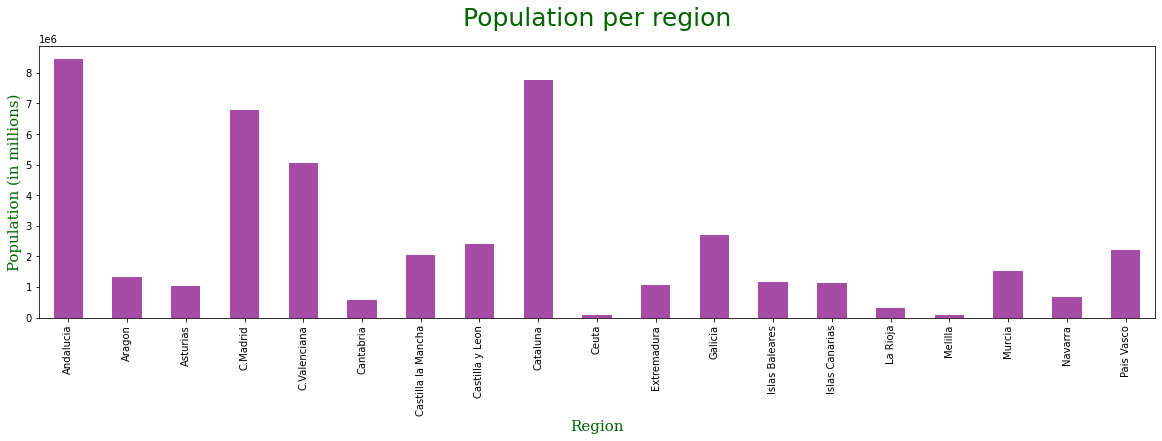

In [8]:
fig, ax = plt.subplots(figsize = (20, 5))
font = {'family': 'serif',
        'color':  'darkgreen',
        'weight': 'normal',
        'size': 15,
        }
ax.set_title('Population per region', 
             pad = 20, 
             fontdict = {'fontsize':25, 'color': 'darkgreen'})
province_data.groupby(['Region']).sum()['Population'].plot(kind='bar',color = 'purple',alpha = 0.7)
plt.xlabel('Region', fontdict=font)
plt.ylabel('Population (in millions)', fontdict=font)
plt.show()

---

**The second hypothesis is true.** Having a huge population matches with a higher number of awarded restaurants. For example, Andalucia is the most populated region but in terms of awarded restaurants it is fhe fifth.

**Four of the five regions more populated represents the 52% of awarded restaurants and the 60% of Spain population.**

Are these the same regions with the lowest unemployment rates?

---

### Hypothesis 3: 
### "The more award-winning regions have lower unemployment rates."

---

In [9]:
p = province_data.groupby(['Region']).mean()['Unemployment rate'].round(2).sort_values()
r = restaurants["region"].value_counts()

In [10]:
hyp3 = pd.concat([p,r], axis=1)
hyp3 = hyp3.rename(columns ={'region': 'Awarded restaurants'})
hyp3[:5]

,Unemployment rate,Awarded restaurants
C.Madrid,8.25,22.0
Islas Canarias,9.64,5.0
Asturias,9.99,8.0
Cataluna,11.02,54.0
Extremadura,12.73,1.0


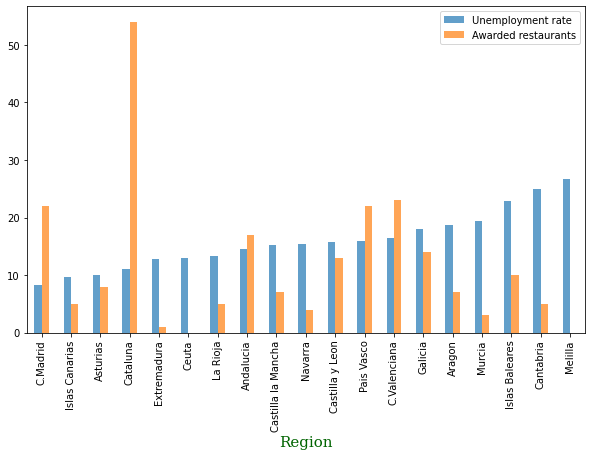

In [11]:
ax.set_title('Population per region', 
             pad = 20, 
             fontdict = {'fontsize':25, 'color': 'darkgreen'})
hyp3.sort_values("Unemployment rate", ascending = True).loc[:,['Unemployment rate','Awarded restaurants']].plot(kind='bar',alpha = 0.7,figsize = (10, 6))
plt.xlabel('Region', fontdict=font)
plt.show()

In [26]:
plt.savefig("Ejemplo.jpg", bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

---
**Hypothesis 3 is not fulfilled.**

The figure above shows, based on unemployment rate ascending order, the numbers for each region. On it, it can be seen that the unemployment rate bears no relation to the number of restaurants located in the region.

For example, C.Madrid is the third region in number of awarded restaurants and it has the lowest unemployment rate. On the other side, we find País Vasco or C.Valenciana which are located in the top 5 Michelin Stars awarded region, but with some of the highest unemployment rates in the country.

***After analyzing unemployment rate we suggest: are related unemployment rate and menus' average prices?***

---

### Hypothesis 4:
### "Average menu prices are higher in regions with lower unemployment rates regions."

---

In [13]:
restaurants.groupby(['region']).mean()['price_average'].round(1)

region
Andalucia             110.2
Aragon                 78.7
Asturias               91.9
C.Madrid              114.2
C.Valenciana           92.2
Cantabria             100.7
Castilla la Mancha     71.0
Castilla y Leon        75.8
Cataluna              102.5
Extremadura           185.0
Galicia                76.8
Islas Baleares         95.2
Islas Canarias        101.2
La Rioja              101.8
Murcia                 82.5
Navarra                93.9
Pais Vasco            132.1
Name: price_average, dtype: float64

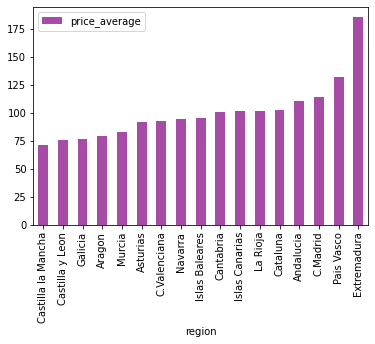

In [14]:
restaurants.groupby('region').mean().sort_values("price_average", ascending = True).loc[:,['price_average']].plot(kind='bar',color = 'purple',alpha = 0.7)
plt.show()

---
**There is not a direct relationship between higher menu price on average and lower unemployment rate.**

We can observe, for example Cantabria, which unemployment rate (24.91%) is the second greater and whose average menu price is in the middle (around 100€).

Although, Asturias presents one of the lowest unemployment rate (9.99%) an one of the lowest average prices (92€).

---

### Hypothesis 5: 
### "Highest menu prices are associated to restaurants that counts with a higher number of stars."

---

In [15]:
restaurants.groupby(['michelin_stars']).mean()['price_average'].round(1)

michelin_stars
1     86.0
2    143.9
3    214.2
Name: price_average, dtype: float64

In [27]:
output_file("barplot.html")

options = dict(plot_width=300, plot_height=300,
               tools="pan,wheel_zoom,box_zoom,box_select,lasso_select")

p1 = figure(title="price average vs. michelin stars", **options)
p1.circle("price_average", "michelin_stars", color="green", source = restaurants)


p = gridplot([[p1]], toolbar_location="right")

show(p)

---
**The graph generated shows that effectively, restaurants with a greater average price are associated with most starred award winners restaurants.**


---

### Hypothesis 6: 
### "Most Michelin-starred restaurants in Spain have been awarded only one star."

---

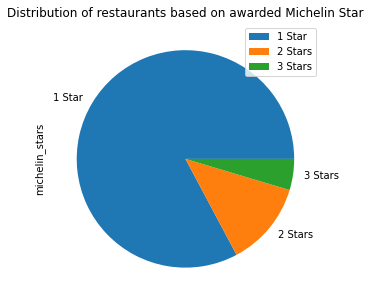

In [17]:
df = pd.DataFrame({'michelin_stars': [0.895, 0.136, 0.05],
                   'restaurant': [179, 30, 11]},
                  index = ['1 Star', '2 Stars', '3 Stars'])


plot = df.plot.pie(y='michelin_stars', figsize=(5, 5),title = 'Distribution of restaurants based on awarded Michelin Star')

---

**The graph above confirms the Hypothesis 6**. 80% of Spanish Michelin restraurants has been awarded just with one Star.

Additionaly, in graph bellow is shown the distribution of restaurants per number of stars and per region.

---

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


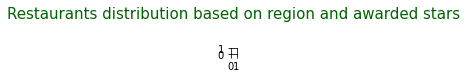

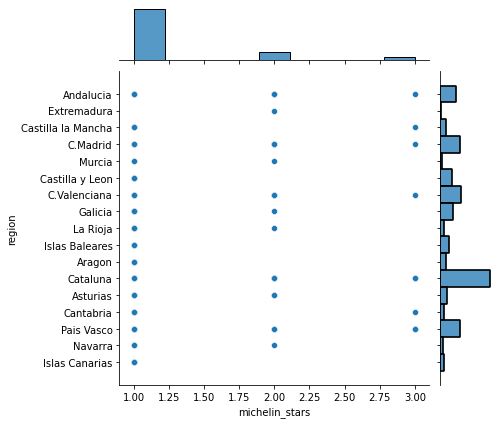

In [18]:
fig, ax = plt.subplots(figsize = (0.1,0.1))
font = {'family': 'serif',
        'color':  'darkgreen',
        'weight': 'normal',
        'size': 30,
        }
ax.set_title('Restaurants distribution based on region and awarded stars',
             pad = 30, 
             fontdict = {'fontsize':15, 'color': 'darkgreen'})
sns.jointplot(restaurants.michelin_stars, restaurants.region)
plt.xlabel('Michelin stars', fontdict=font)
plt.ylabel('Region', fontdict=font)
plt.show()

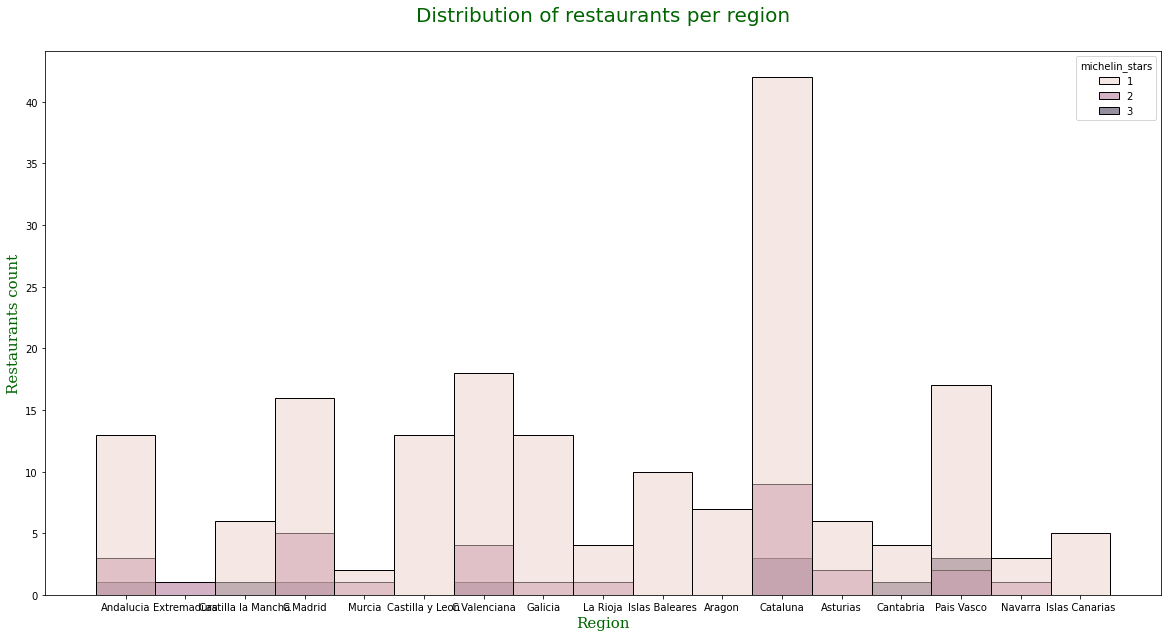

In [19]:
fig, ax = plt.subplots(figsize = (20,10))
font = {'family': 'serif',
        'color':  'darkgreen',
        'weight': 'normal',
        'size': 15,
        }
ax.set_title('Distribution of restaurants per region', 
             pad = 30, 
             fontdict = {'fontsize':20, 'color': 'darkgreen'})
sns.histplot(x = restaurants.region, hue = restaurants.michelin_stars, cumulative = False)
plt.xlabel('Region', fontdict=font)
plt.ylabel('Restaurants count', fontdict=font)
plt.show()

In [20]:
# Elegir uno de los dos gráficos

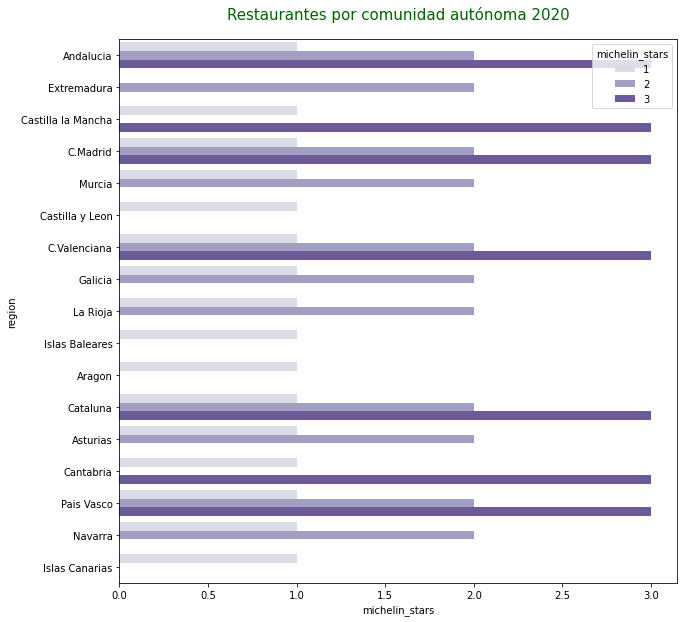

In [21]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.set_title('Restaurantes por comunidad autónoma 2020', 
             pad = 20, 
             fontdict = {'fontsize':15, 'color': 'Darkgreen'})
sns.barplot(x = "michelin_stars", y = "region",hue = "michelin_stars", data = restaurants, ax = ax, palette = "Purples");

---

**In terms of Stars, the distribution based on number of stars is as follows:**  
    - 80% of restaurants are awarded with 1 Michelin Star.  
    - 15% of restaurants are awarded with 2 Michelin Star.  
    - 5% of restaurants are awarded with 1 Michelin Star.
    
***It is true than most of the resturants have been awarded with only one Michelin Star***  

---

### Hypothesis 7: 
### "Most of the restaurant are located in coast provinces."


---

In [22]:
restaurants["coast_province"].value_counts()

Yes    150
No      70
Name: coast_province, dtype: int64

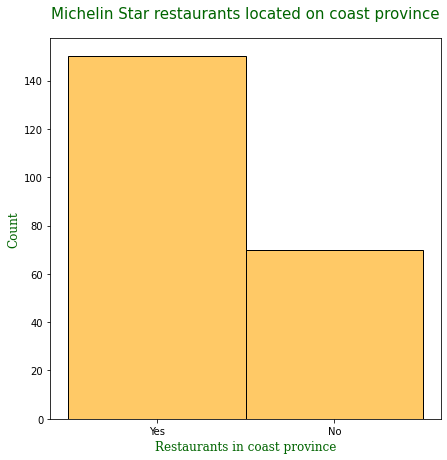

In [23]:
fig, ax = plt.subplots(figsize = (7,7))
font = {'family': 'serif',
        'color':  'darkgreen',
        'weight': 'normal',
        'size': 12,
        }
ax.set_title('Michelin Star restaurants located on coast province', 
             pad = 20, 
             fontdict = {'fontsize':15, 'color': 'darkgreen'})
sns.histplot(restaurants.coast_province,color = 'orange', alpha = 0.6)
plt.xlabel('Restaurants in coast province', fontdict=font)
plt.ylabel('Count', fontdict=font)
plt.show()

---

**The hypothesis analyzed is true.** 

As it is shown in the graph above, most of Spain's Michelin-starred restaurants are located in coastal provinces. It sums a total of 150 restaurants, equivalent to 68% of Michelin Spanish restaurants.

---

### Hypothesis 8: 
### "Spanish tourism is concentrated in regions with the most Michelin Star restaurants."

---

In [24]:
tourists2019

,region,Total
0,Andalucia,12023153.0
1,C.Madrid,7640980.0
2,C.Valenciana,9535495.0
3,Canarias,13146862.0
4,Cataluna,19375153.0
5,Islas Baleares,13679781.0
6,Other regions,8107727.0
7,Total,83509151.0


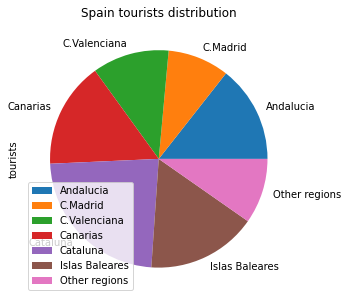

In [25]:
tourists_df = pd.DataFrame({'tourists': [12023153.0/83509151.0,
                                         7640980.0/83509151.0,
                                         9535495.0/83509151.0,
                                         13146862.0/83509151.0,
                                         19375153.0/83509151.0,
                                         13679781.0/83509151.0
                                         ,8107727.0/83509151.0]},
                           index = ['Andalucia', 'C.Madrid', 'C.Valenciana', 'Canarias','Cataluna', 'Islas Baleares','Other regions'])


plot = tourists_df.plot.pie(y='tourists', figsize=(5, 5),title = 'Spain tourists distribution')

---
**The pie chart aboves shows the Spanish Tourism distribution. It can be confirmed that as more tourism more Michelin Star restaurants are located in a region.**

---